# Mnist Data Learning 
   With Simple Logistic Regression

In [1]:
# %%
%matplotlib inline
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt


In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# 70 Thousand Sample Images

print mnist.train.num_examples+ mnist.test.num_examples + mnist.validation.num_examples , "\n"

print "For Training" ,mnist.train.num_examples, "\nFor Testing" ,mnist.test.num_examples,"\nFor Validation",mnist.validation.num_examples


70000 

For Training 55000 
For Testing 10000 
For Validation 5000


Viewing all The Different Data
====

The data for Training $( The$ $Input$ $Values$$)$ have a shape of $(55000,768)$ And the data labels are encoded using one hot encoding with $10$ output classes

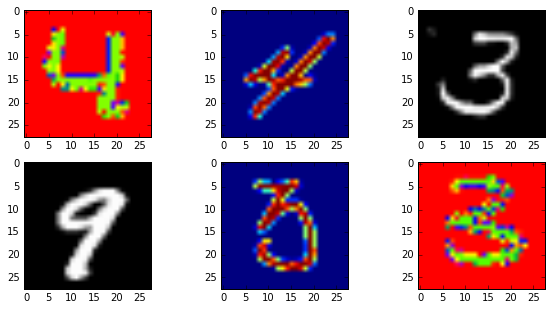

In [36]:
fig, ((ax1 ,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(10,5))
ax1.imshow(np.reshape(mnist.train.images[97, :], (28, 28)), cmap='prism' )
ax2.imshow(np.reshape(mnist.train.images[98, :], (28, 28)), cmap='jet')
ax3.imshow(np.reshape(mnist.train.images[96, :], (28, 28)), cmap='gray')
ax4.imshow(np.reshape(mnist.train.images[95, :], (28, 28)), cmap='gray')
ax5.imshow(np.reshape(mnist.train.images[94, :], (28, 28)), cmap='jet')
ax6.imshow(np.reshape(mnist.train.images[93, :], (28, 28)), cmap='prism')
plt.show()

In [37]:
n_input = 784
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])

W = tf.Variable(tf.zeros([n_input, n_output]))
b = tf.Variable(tf.zeros([n_output]))
net_output = tf.nn.softmax(tf.matmul(net_input, W) + b)

y_true = tf.placeholder(tf.float32, [None, 10])

cross_entropy = -tf.reduce_sum(y_true * tf.log(net_output))

correct_prediction = tf.equal(tf.argmax(net_output, 1), tf.argmax(y_true, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

optimizer = tf.train.GradientDescentOptimizer(
    0.01).minimize(cross_entropy)


In [38]:

sess = tf.Session()
sess.run(tf.initialize_all_variables())
# %% Now actually do some training:
batch_size = 100
n_epochs = 10
for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples // batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys
        })
    print(sess.run(accuracy,
                   feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels
                   }))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.9164
0.9236
0.92
0.9204
0.9204
0.907
0.9234
0.9202
0.9226
0.9262
